<a href="https://colab.research.google.com/github/IAMLATI/Demo-Repo2/blob/master/Time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('flights')

In [4]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [6]:
df.shape


(144, 3)

In [7]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [8]:
df.isna().sum()

,0
year,0
month,0
passengers,0


In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
df['YearMonth']= pd.to_datetime("01-"+df['month'].astype(str)+"-"+df["year"].astype(str))

In [11]:
df.set_index('YearMonth', inplace=True)

In [12]:
df.head()

,year,month,passengers
YearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='YearMonth', ylabel='passengers'>

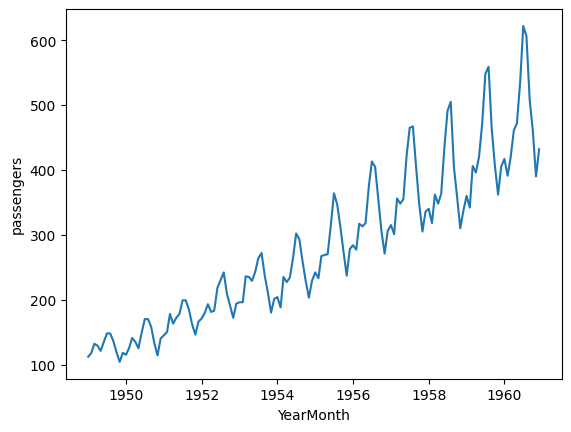

In [13]:
sns.lineplot(data=df, x=df.index, y=df.passengers)

Trend , seasonal cyclic and irregular

Stationarity
Mean and Variance
ADF- AUGMENTED DICKEY FULLER TEST
TEST STATISTICS < CRITICAL VALUES - THE DATA IS STATIONARY

ROLLING STATITSTICS


In [14]:
"""df['RollMean']= df.passengers.rolling(window=12).mean()
df['RollStd']= df.passengers.rolling(window=12).std()"""

"df['RollMean']= df.passengers.rolling(window=12).mean()\ndf['RollStd']= df.passengers.rolling(window=12).std()"

In [15]:
"""plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y=df.passengers)
sns.lineplot(data=df, x=df.index, y=df.RollMean)
sns.lineplot(data=df, x=df.index, y=df.RollStd)"""

'plt.figure(figsize=(10,5))\nsns.lineplot(data=df, x=df.index, y=df.passengers)\nsns.lineplot(data=df, x=df.index, y=df.RollMean)\nsns.lineplot(data=df, x=df.index, y=df.RollStd)'

In [16]:
"""from statsmodels.tsa.stattools import adfuller"""

'from statsmodels.tsa.stattools import adfuller'

In [17]:
"""adfTest= adfuller(df['passengers'], autolag='AIC')"""

"adfTest= adfuller(df['passengers'], autolag='AIC')"

In [18]:
"""adfTest"""

'adfTest'

In [19]:
"""stats =pd.Series(adfTest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'used number of observation used'])"""

"stats =pd.Series(adfTest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'used number of observation used'])"

In [20]:
"""stats"""

'stats'

In [21]:
"""for key, values in adfTest[4].items():
    print("criticality" ,key, ':',values)"""

'for key, values in adfTest[4].items():\n    print("criticality" ,key, \':\',values)'

Making Data Stationary
Time shift Log Square Root, cube

In [22]:
def test_stationarity(dataFrame,var):
  dataFrame['rollMean']= dataFrame[var].rolling(window=12).mean()
  dataFrame['rollStd']= dataFrame[var].rolling(window=12).std()

  from statsmodels.tsa.stattools import adfuller
  adfTest2= adfuller(dataFrame[var], autolag='AIC')
  stats2 =pd.Series(adfTest2[0:4], index=['Test Statistic', 'p-value', '#lags used', 'used number of observation used'])
  print(stats2)

  for key, values in adfTest2[4].items():
    print("criticality" ,key, ':',values)

  sns.lineplot(data=dataFrame, x=dataFrame.index, y=var)
  sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollMean')
  sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollStd')



Test Statistic                       0.815369
p-value                              0.991880
#lags used                          13.000000
used number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


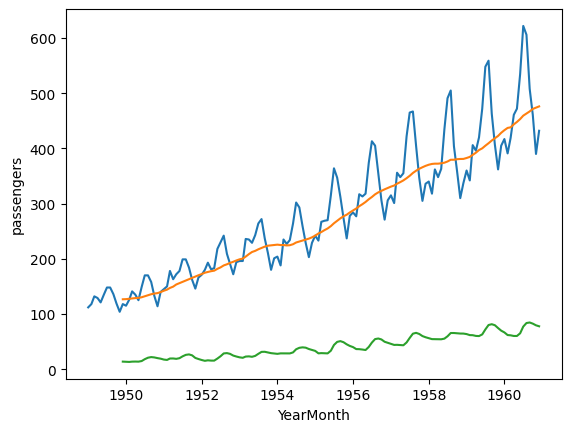

In [23]:
test_stationarity(df,"passengers")

In [24]:
df.head()

,year,month,passengers,rollMean,rollStd
YearMonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


In [25]:
shift_df=df[['passengers']]

In [26]:
shift_df.head()

,passengers
YearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
shift_df['shift']= shift_df.passengers.shift()
shift_df["shift_diff"]= shift_df['passengers'] - shift_df['shift']
shift_df.head()

,passengers,shift,shift_diff
YearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


Test Statistic                      -2.829267
p-value                              0.054213
#lags used                          12.000000
used number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


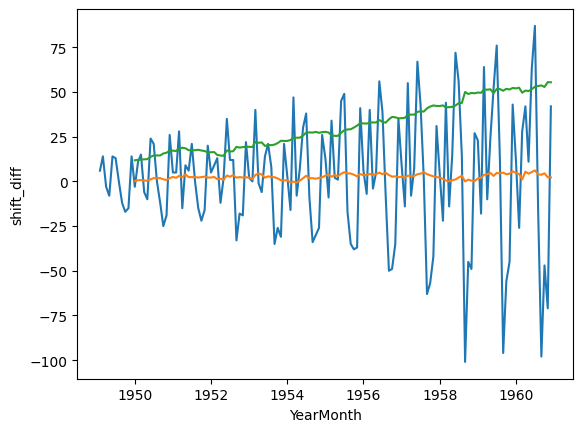

In [28]:
test_stationarity(shift_df.dropna(), "shift_diff")

In [29]:
log_df=df[['passengers']]
log_df

,passengers
YearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [30]:
log_df['log']= np.log(log_df['passengers'])
log_df.head()

,passengers,log
YearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


Test Statistic                      -1.717017
p-value                              0.422367
#lags used                          13.000000
used number of observation used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


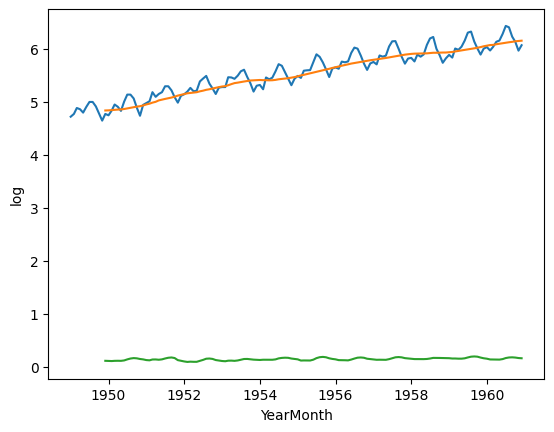

In [31]:
test_stationarity( log_df, "log")

In [32]:
log_df2= log_df[['passengers', "log"]]
log_df2['log_sqrt']= np.sqrt(log_df['log'])
log_df2['logshiff_diff']=log_df2['log_sqrt']- log_df2['log_sqrt'].shift()
log_df2.head()

,passengers,log,log_sqrt,logshiff_diff
YearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


Test Statistic                      -2.611019
p-value                              0.090741
#lags used                          14.000000
used number of observation used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


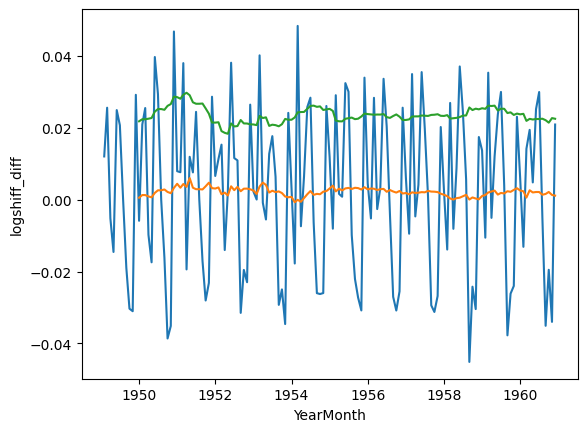

In [33]:
test_stationarity( log_df2.dropna(), "logshiff_diff")

In [34]:
df.head()

,year,month,passengers,rollMean,rollStd
YearMonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


In [36]:
airp= df[['passengers']].copy(deep=True)

In [38]:
airp["firstDiff"]= airp['passengers'].diff()
airp["Diff12"]= airp['passengers'].diff(12)

In [39]:
airp

,passengers,firstDiff,Diff12
YearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
...,...,...,...
1960-08-01,606,-16.0,47.0
1960-09-01,508,-98.0,45.0
1960-10-01,461,-47.0,54.0


In [48]:
from statsmodels.tsa.arima.model import ARIMA  # ← updated import path

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

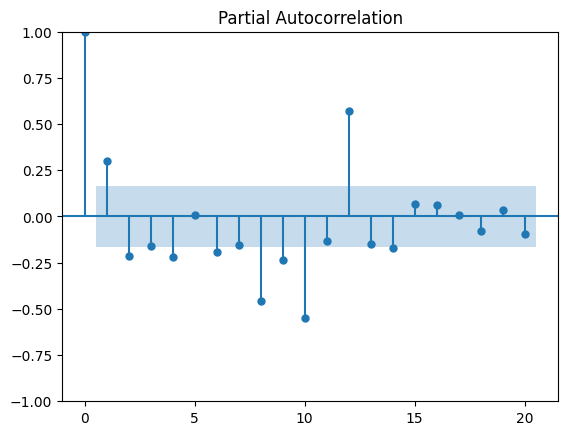

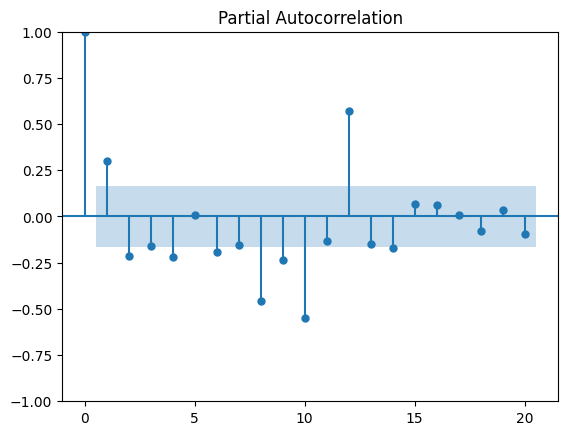

In [49]:
plot_pacf(airp['firstDiff'].dropna(), lags=20)

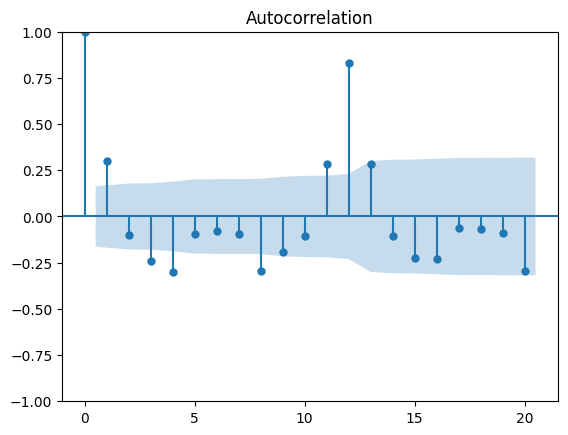

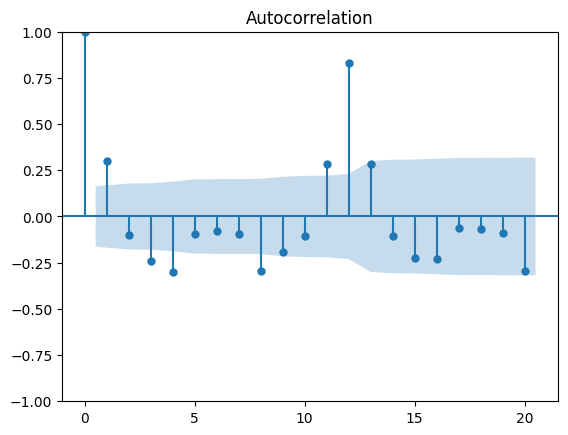

In [50]:
plot_acf(airp['firstDiff'].dropna(), lags=20)

In [51]:
train= airp[:round(len(airp)*70/100)]
test=airp[round(len(airp)*70/100):]

In [54]:
model=ARIMA(train['passengers'],order=(1,1,3))
model_fit= model.fit()
prediction =model_fit.predict(start=test.index[0], end=test.index[-1])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [64]:
airp['arimaPred']=prediction


In [65]:
airp.tail()

,passengers,firstDiff,Diff12,arimaPred
YearMonth,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='YearMonth', ylabel='passengers'>

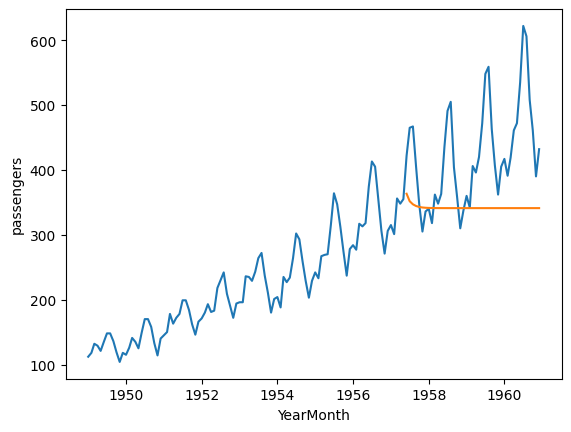

In [68]:
airp.dropna()
sns.lineplot(data=airp, x=airp.index, y='passengers')
sns.lineplot(data=airp, x=airp.index, y='arimaPred')

In [61]:

airp.head()

,passengers,firstDiff,Diff12,arimaPred
YearMonth,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN


In [69]:
from sklearn.metrics import mean_squared_error

In [72]:
test.head()

,passengers,firstDiff,Diff12
YearMonth,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [74]:
np.sqrt(mean_squared_error(test['passengers'], prediction))

np.float64(111.1101033142743)

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

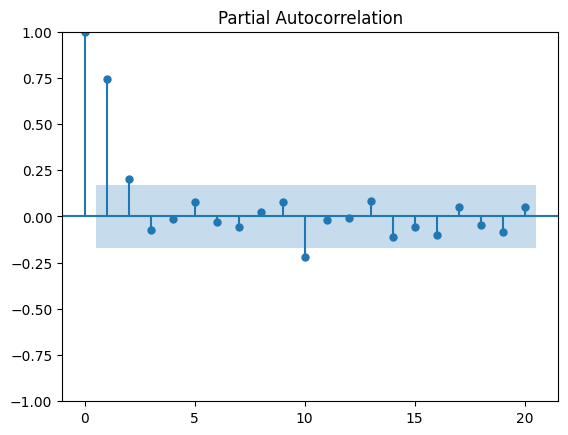

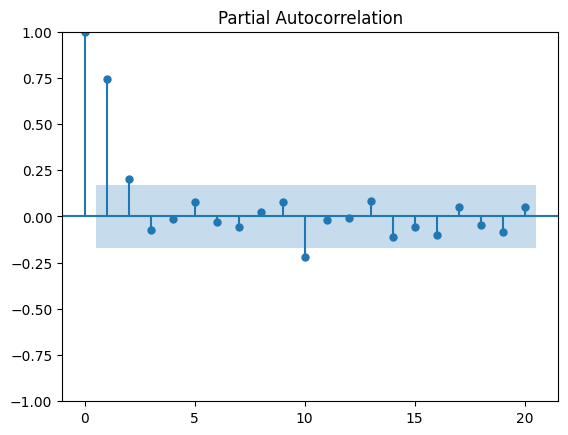

In [76]:
plot_pacf(airp['Diff12'].dropna(), lags=20)

In [77]:
model=SARIMAX(train['passengers'],order=(1,1,3), seasonal_order=(1,1,3,12))
model_fit2= model.fit()
prediction2 =model_fit2.predict(start=test.index[0], end=test.index[-1])
airp['Sarimaxpred']= prediction2

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [78]:
airp.tail()

,passengers,firstDiff,Diff12,arimaPred,Sarimaxpred
YearMonth,,,,,
1960-08-01,606,-16.0,47.0,341.111333,599.426270
1960-09-01,508,-98.0,45.0,341.111333,534.545059
1960-10-01,461,-47.0,54.0,341.111333,479.577349
1960-11-01,390,-71.0,28.0,341.111333,431.919762
1960-12-01,432,42.0,27.0,341.111333,477.429250


<Axes: xlabel='YearMonth', ylabel='passengers'>

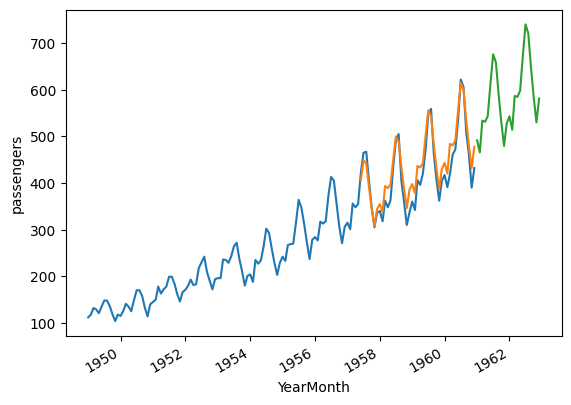

In [91]:
airp.dropna()
sns.lineplot(data=airp, x=airp.index, y='passengers')
sns.lineplot(data=airp, x=airp.index, y='Sarimaxpred')
model_fit2.predict(start=futuredate.index[0], end=futuredate.index[-1]).plot()

In [80]:
np.sqrt(mean_squared_error(test['passengers'], prediction2))

np.float64(27.68175159393607)

In [81]:
airp.tail()

,passengers,firstDiff,Diff12,arimaPred,Sarimaxpred
YearMonth,,,,,
1960-08-01,606,-16.0,47.0,341.111333,599.426270
1960-09-01,508,-98.0,45.0,341.111333,534.545059
1960-10-01,461,-47.0,54.0,341.111333,479.577349
1960-11-01,390,-71.0,28.0,341.111333,431.919762
1960-12-01,432,42.0,27.0,341.111333,477.429250


In [86]:
futuredate=pd.DataFrame(pd.date_range(start='1961-01-01', end = '1962-12-01', freq='MS' ), columns=['dates'])
futuredate.set_index('dates', inplace=True)

<Axes: >

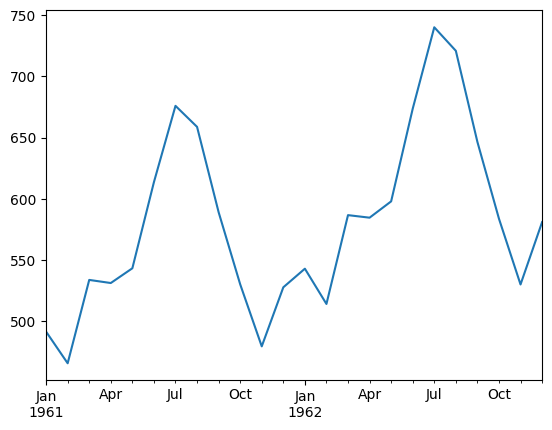

In [90]:
model_fit2.predict(start=futuredate.index[0], end=futuredate.index[-1]).plot()